# Compare Explanation

In [21]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from datetime import date

import matplotlib.pyplot as plt
from sktime.classification.shapelet_based import MrSEQLClassifier
from sklearn.linear_model import RidgeClassifierCV
from pyts.transformation import WEASEL
from sklearn.metrics import accuracy_score

import utils.visualization as vis
import utils.process_result as process_result
import utils.visualization as vis
from utils.data import LocalDataLoader, data_summary
from scripts.Explanation import load_explanation
from scripts.CompareExplanation import CompareExplanation, run_experiment

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


CMJ
Dataset: CMJ
X_train.shape:  (419, 1, 500)
X_test.shape:  (179, 1, 500)
Unique target class:  ['0', '1', '2']
Dataset: CMJ, Training Data-Global mean value: 36.99815
------------------------------


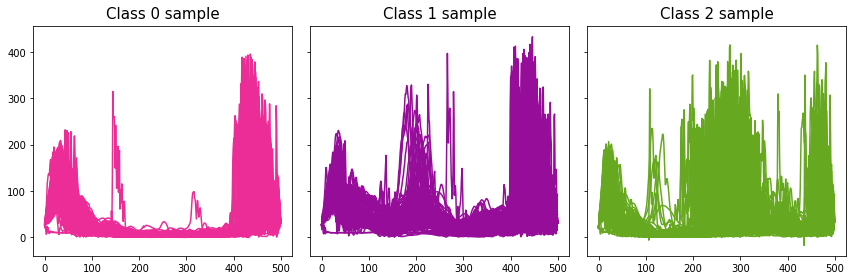

In [30]:
ds_list = [ 
            'CMJ',
#           'Coffee',
#           'SmallMiddle_CAR'
]
ds_dir = 'data'

for ds in ds_list:
    print(ds)
    data_summary(ds_dir,ds)
    print('------------------------------')

### Compare

Choose the explanations to compare and the list of referees. This comparison will take a while 

In [ ]:
# Choose the explanations (weights from a method)
XAIS_LIST = ['GradientShap','IG','LIME','ROCKET', 'MrSEQL','RIDGECV','ROCKET_SHAP','MRSEQL_SHAP']
XAIS_NAMES = ['GradientShap','IntegratedGradient','mrseql-lime','rocket-lime', 'mrseql','ridgecv','rocket-shap','mrseql-shap'] 

# Choose a referee 
ref_list = ['rocket','resnet','knn','MrSEQLClassifier','weasel']


for ds in ds_list:
    print(ds)
    run_experiment(datapath=ds_dir,dataset=ds,
                   xais = XAIS_LIST, explanation_names = XAIS_NAMES,
                   referee_list=ref_list, 
                   perturbation_types=[
        'local_mean','global_mean',
        'global_gaussian','local_gaussian'
    ],
                    include_random_exp=True)

### Get Explanation Power
With pre-calculated accuracy in each perturbation step (default 10% step)

In [31]:
df = process_result.xai_average_ranking(ds)
df

,dataset,XAI_method,average_scaled_auc,scaled_ranking,explanation_power,ranking
0,CMJ,GS,0.788199,0.940500,0.059500,8.0
1,CMJ,IG,0.832245,1.000000,0.000000,9.0
2,CMJ,lime_mrseql,0.100210,0.011110,0.988890,2.0
3,CMJ,lime_rocket,0.418268,0.440769,0.559231,5.0
4,CMJ,mrseql,0.164626,0.098129,0.901871,3.0
5,CMJ,mrseql-shap,0.091985,0.000000,1.000000,1.0
6,CMJ,random2020,0.656901,0.763132,0.236868,7.0
7,CMJ,ridgecv,0.605902,0.694239,0.305761,6.0
8,CMJ,rocket-shap,0.207227,0.155678,0.844322,4.0



## Visualize explanations

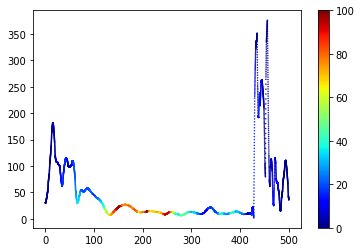

In [32]:
XAIS_LIST = ['GradientShap','IG','LIME','ROCKET','MRSEQL_SHAP','ROCKET_SHAP','MrSEQL','RIDGECV']
XAIS_NAMES = ['GradientSHAP','Integrated Gradient','MrSEQL-LIME','ROCKET-LIME','MRSEQL-SHAP','ROCKET-SHAP','MrSEQL-SM','RIDGECV-SM']

# choose an explanation from list and an index to visualize
xai = XAIS_LIST[6]
example_index = 18


# get time series:
data = LocalDataLoader(datapath=ds_dir,dataset=ds)
X_train,y_train,X_test,y_test =data.get_X_y(onehot_label=False)

# Get saved explanations
is_reshape = True if xai in ['LIME','ROCKET','ROCKET_SHAP','MRSEQL_SHAP'] else False
explanation_weights = load_explanation(datapath=ds_dir,dataset=ds,explanation_type=xai, 
                evaluation_on_subset=False, reshape_lime=is_reshape,eval_size=1)

# visualize
vis.visualize_single_explanation(X_test[example_index], explanation_weights[example_index])
    
